In [14]:
from pdf_wrapper import PDFWrapper
import pdfminer
import sys
import matplotlib.patches as patches
from bs4 import BeautifulSoup
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
from pdfminer.high_level import extract_pages
from pdfminer.layout import LTTextContainer, LTTextLineHorizontal
from tqdm import tqdm
from pdfminer.layout import LAParams

In [32]:
fname = "data/pdf/vita_web.pdf"
cv = PDFWrapper(fname, LAParams(boxes_flow=None))

Using laparams =  <LAParams: char_margin=2.0, line_margin=0.5, word_margin=0.1 all_texts=False>


15it [00:00, 16.32it/s]


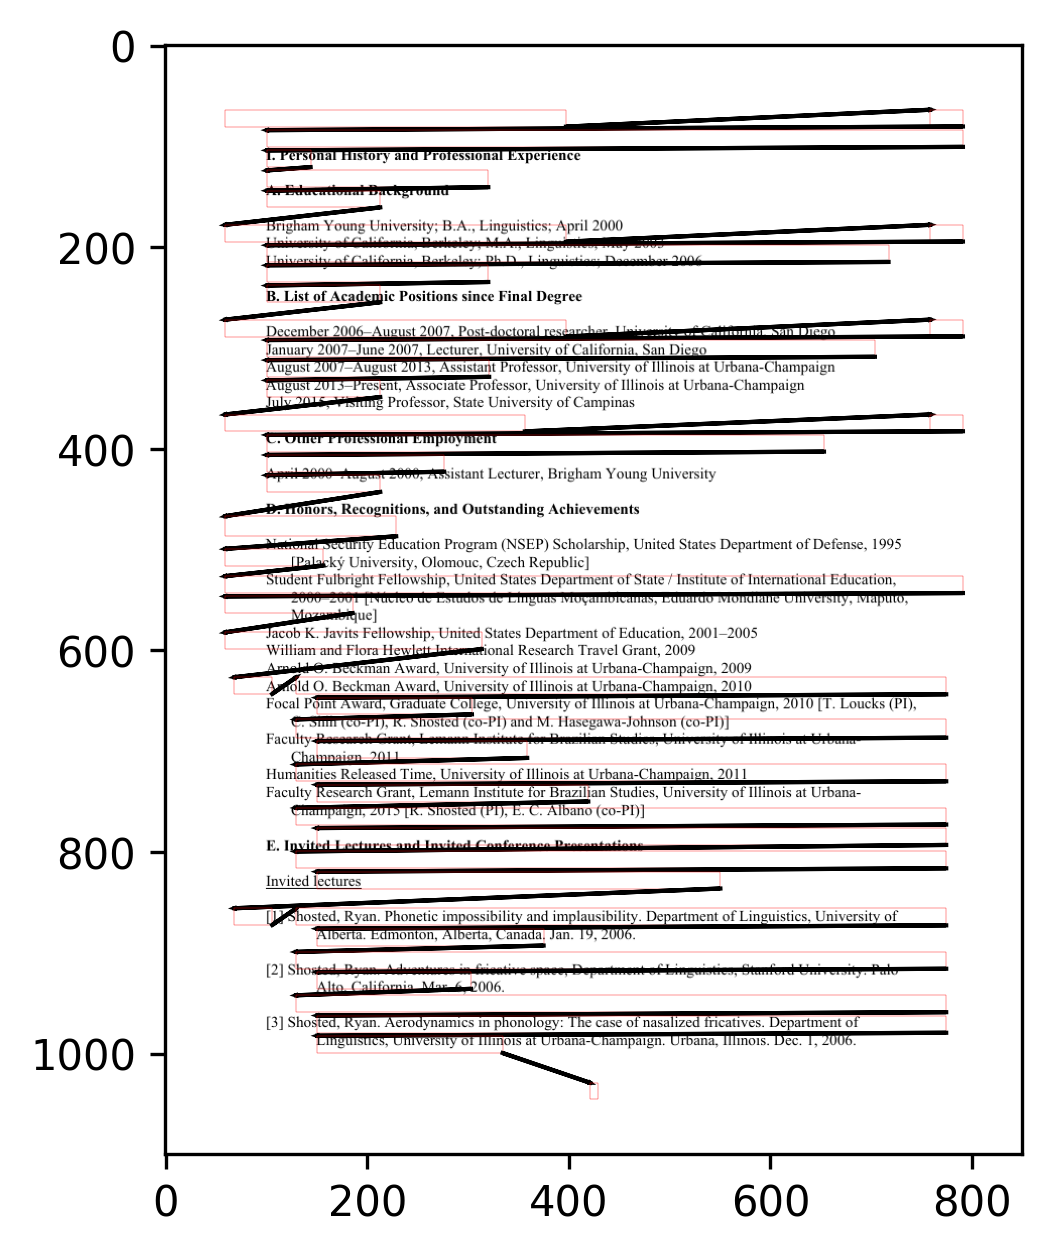

In [33]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
ax = cv.render_page(1)   
plt.show()

In [34]:
def reject_outliers(data, m=3):
    return data[(np.abs(data - data.mean()) < m * data.std())]

(array([1.279e+03, 5.220e+02, 1.960e+02, 2.600e+01, 1.280e+02, 3.570e+02,
        1.400e+01, 2.000e+01, 2.400e+01, 6.700e+01, 1.300e+02, 9.000e+00,
        3.000e+00, 7.000e+00, 6.000e+00, 1.870e+02, 5.000e+01, 2.000e+00,
        0.000e+00, 1.000e+00, 3.200e+01, 2.800e+01, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 5.000e+00, 8.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.        ,  0.22957143,  0.45914286,  0.68871429,  0.91828571,
         1.14785714,  1.37742857,  1.607     ,  1.83657143,

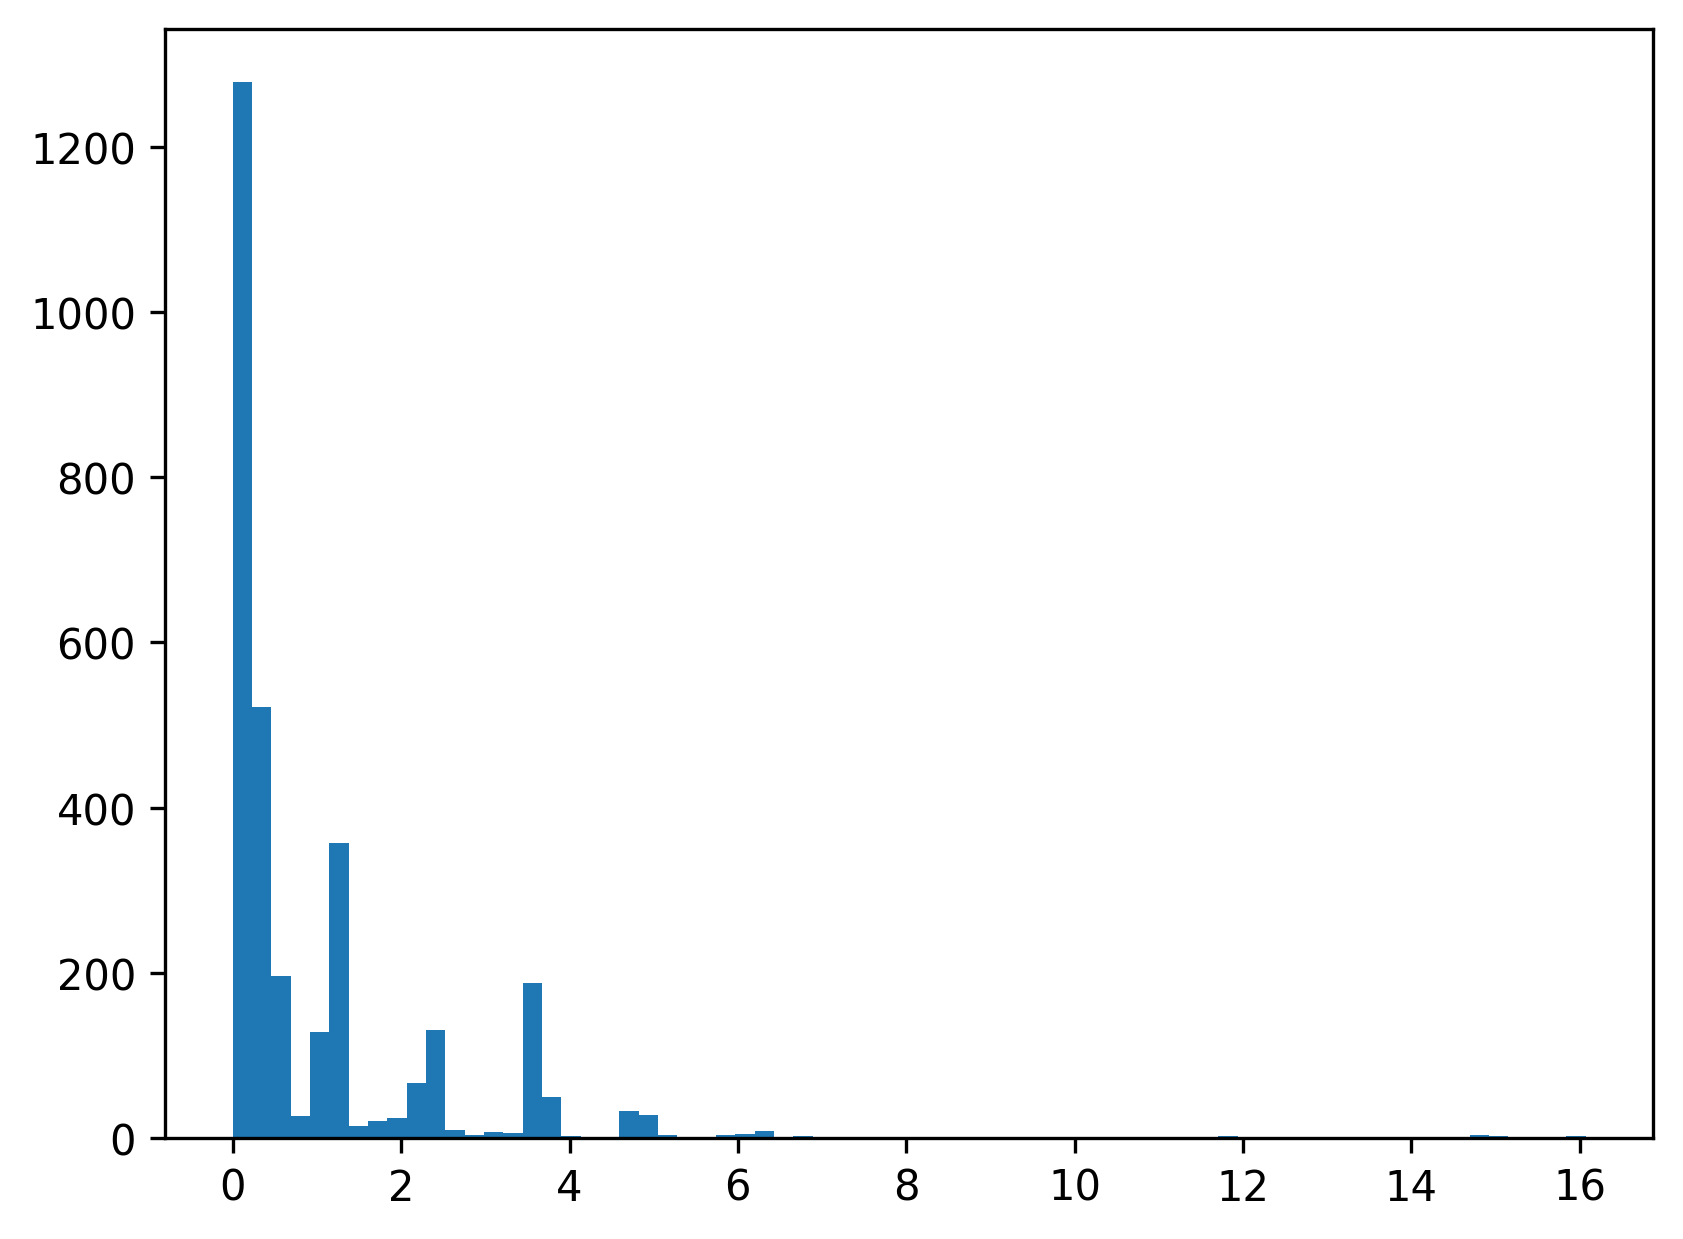

In [35]:
y_diff = cv.get_ydiff_distribution()
y_diff = y_diff[y_diff >= 0]

plt.hist(reject_outliers(y_diff), bins = 70)

In [36]:
uni, cnts = np.unique(y_diff, return_counts = True)

<LAParams: char_margin=2.0, line_margin=1.0, word_margin=0.1 all_texts=False>
Using laparams =  <LAParams: char_margin=2.0, line_margin=1.0, word_margin=0.1 all_texts=False>


15it [00:00, 16.70it/s]


<AxesSubplot:>

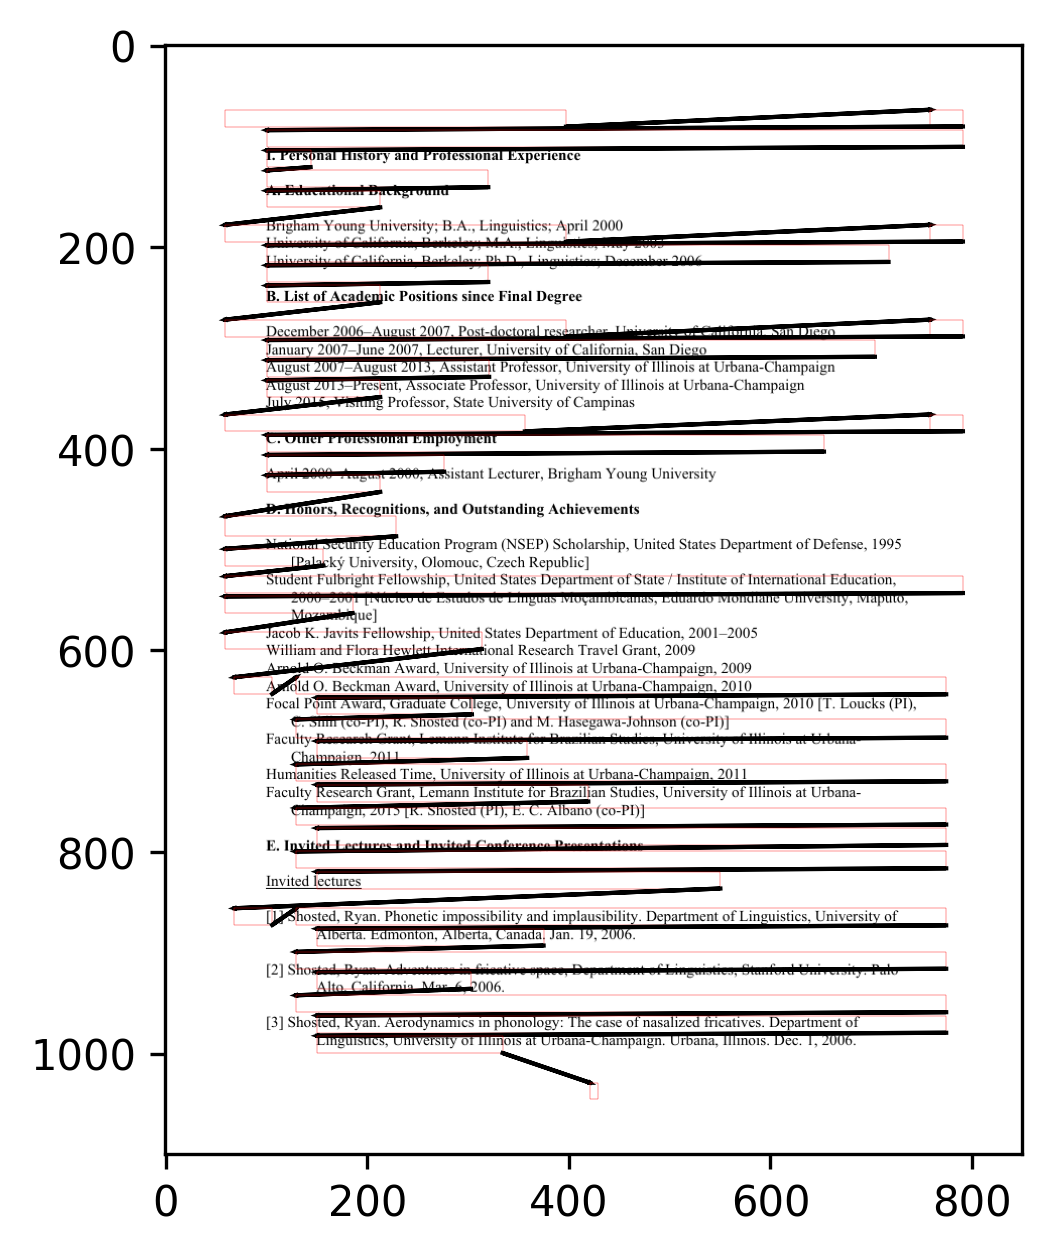

In [37]:
laparams = LAParams(line_margin = 1.0)
print(laparams)
cv = PDFWrapper(fname, laparams_ = laparams)
cv.render_page(1)

In [38]:
line_cnt = 0
from sys import exit
for page_layout in tqdm(extract_pages(fname, laparams = laparams)):
    for element in page_layout:
        if isinstance(element, LTTextContainer):
            for line in element:
                if(isinstance(line, LTTextLineHorizontal)):
                    print(line.__dir__())
                    el = line._objs[0]
                    # print(type(el))
                    # print(el.__dir__())
                    print(el.size, el.fontname, el.matrix, el.bbox)

print(line_cnt)

4it [00:00, 30.88it/s]

['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_margin', '_x1', '__module__', '__init__', 'add', 'find_neighbors', '_is_left_aligned_with', '_is_right_aligned_with', '_is_centrally_aligned_with', '_is_same_height_as', '__doc__', '__parameters__', '__repr__', 'analyze', 'is_empty', '__orig_bases__', 'get_text', '__iter__', '__len__', 'extend', '__lt__', '__le__', '__gt__', '__ge__', 'set_bbox', 'is_hoverlap', 'hdistance', 'hoverlap', 'is_voverlap', 'vdistance', 'voverlap', '__dict__', '__weakref__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__eq__', '__ne__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '__slots__', '_is_protocol', '__class_getitem__']
10.980000000000018 DEKPDP+TimesNewRomanPS-BoldMT (10.98, 0.0, 0.0, 10.98, 72.0, 709.8) (72.0, 707.42832, 79.92756, 718.40832)
['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_margin

11it [00:00, 25.22it/s]

['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_margin', '_x1', '__module__', '__init__', 'add', 'find_neighbors', '_is_left_aligned_with', '_is_right_aligned_with', '_is_centrally_aligned_with', '_is_same_height_as', '__doc__', '__parameters__', '__repr__', 'analyze', 'is_empty', '__orig_bases__', 'get_text', '__iter__', '__len__', 'extend', '__lt__', '__le__', '__gt__', '__ge__', 'set_bbox', 'is_hoverlap', 'hdistance', 'hoverlap', 'is_voverlap', 'vdistance', 'voverlap', '__dict__', '__weakref__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__eq__', '__ne__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '__slots__', '_is_protocol', '__class_getitem__']
10.980000000000018 DEKPNO+TimesNewRomanPSMT (10.98, 0.0, 0.0, 10.98, 72.0, 709.86) (72.0, 707.48832, 75.65634, 718.4683200000001)
['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_ma

15it [00:00, 22.51it/s]

['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_margin', '_x1', '__module__', '__init__', 'add', 'find_neighbors', '_is_left_aligned_with', '_is_right_aligned_with', '_is_centrally_aligned_with', '_is_same_height_as', '__doc__', '__parameters__', '__repr__', 'analyze', 'is_empty', '__orig_bases__', 'get_text', '__iter__', '__len__', 'extend', '__lt__', '__le__', '__gt__', '__ge__', 'set_bbox', 'is_hoverlap', 'hdistance', 'hoverlap', 'is_voverlap', 'vdistance', 'voverlap', '__dict__', '__weakref__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__eq__', '__ne__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__', '__slots__', '_is_protocol', '__class_getitem__']
10.980000000000018 DEKPNO+TimesNewRomanPSMT (10.98, 0.0, 0.0, 10.98, 72.0, 708.36) (72.0, 705.98832, 75.65634, 716.9683200000001)
['x0', 'y0', 'x1', 'y1', 'width', 'height', 'bbox', '_objs', 'word_ma

In [ ]:
def get_json(wrapper_obj):
    # gets the JSON content as a string from wrapper_obj
    